# Topic 04-Part 2: Brief Intro to Pandas

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" width=50%>

In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Read in the imdb_details.csv 
df = pd.read_csv('../imdb_details.csv')

# Preview the first 5 rows 
df

,number,title,rating,nbr_votes,description,season
0,1,Rose,7.6,6504,When ordinary shop-worker Rose Tyler meets a m...,1
1,2,The End of the World,7.6,5684,The Doctor takes Rose to the year 5 billion to...,1
2,3,The Unquiet Dead,7.6,5326,The Doctor has great expectations for his late...,1
3,4,Aliens of London,7.0,5116,The Doctor returns Rose to her own time - well...,1
4,5,World War Three,7.1,4943,The Slitheen have infiltrated Parliament and h...,1
...,...,...,...,...,...,...
143,7,Kerblam!,6.4,3954,A mysterious message arrives in a package addr...,11
144,8,The Witchfinders,5.9,3635,"Arriving in 17th Century Lancashire, the TARDI...",11
145,9,It Takes You Away,6.4,3404,"On the edge of a Norwegian fjord, in the prese...",11
146,10,The Battle of Ranskoor Av Kolos,5.5,2949,"Answering nine separate distress calls, the Do...",11


In [16]:
# Check out the .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   number       148 non-null    int64  
 1   title        148 non-null    object 
 2   rating       148 non-null    float64
 3   nbr_votes    148 non-null    int64  
 4   description  148 non-null    object 
 5   season       148 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 7.1+ KB


In [17]:
# Display only the episdoes from season 2
df.loc[df['season']==2]

,number,title,rating,nbr_votes,description,season
13,0,The Christmas Invasion,8.2,5291,"It's Christmas Eve, but this is to be a far fr...",2
14,1,New Earth,7.5,4891,The Doctor and Rose arrive on New Earth and me...,2
15,2,Tooth and Claw,7.9,5041,The Doctor and Rose are transported to 19th Ce...,2
16,3,School Reunion,8.4,5397,The Krillitanes - aliens with a mix-and-match ...,2
17,4,The Girl in the Fireplace,9.3,8504,"The Doctor, Mickey and Rose land on a spaceshi...",2
18,5,Rise of the Cybermen,7.8,4688,The TARDIS crash lands in London on a parallel...,2
19,6,The Age of Steel,7.9,4636,The Cybermen take control of London as the pop...,2
20,7,The Idiot's Lantern,6.9,4814,"As the coronation of Elizabeth II nears, the s...",2
21,8,The Impossible Planet,8.7,5399,When the Doctor and Rose become stranded on a ...,2
22,9,The Satan Pit,8.8,5609,The Doctor risks his life to investigate the p...,2


In [21]:
## Get the # of episdoes in every season, 
num_episodes = df.groupby('season').size()
num_episodes

season
1     13
2     14
3     14
4     14
5     13
6     14
7     15
8     12
9     14
10    13
11    12
dtype: int64

In [25]:
## What is the max number of episodes in any season
num_episodes.max()

15

In [26]:
## What season # had the max number of episodes?
num_episodes.idxmax()

7

In [28]:
## What is the min,max,average, median, etc for the ratings column?
df['rating'].describe()

count    148.000000
mean       7.915541
std        0.938207
min        5.200000
25%        7.300000
50%        7.900000
75%        8.700000
max        9.800000
Name: rating, dtype: float64

In [30]:
# Convert season and number columns into strings to combine
df['season'] = df['season'].astype(str)
df['number'] = df['number'].astype(str)
df.dtypes

number          object
title           object
rating         float64
nbr_votes        int64
description     object
season          object
dtype: object

In [31]:
# Create a new index column that combines season # and episode numbver
df['new-index'] = df['season']+'.'+df['number']
df

,number,title,rating,nbr_votes,description,season,new-index
0,1,Rose,7.6,6504,When ordinary shop-worker Rose Tyler meets a m...,1,1.1
1,2,The End of the World,7.6,5684,The Doctor takes Rose to the year 5 billion to...,1,1.2
2,3,The Unquiet Dead,7.6,5326,The Doctor has great expectations for his late...,1,1.3
3,4,Aliens of London,7.0,5116,The Doctor returns Rose to her own time - well...,1,1.4
4,5,World War Three,7.1,4943,The Slitheen have infiltrated Parliament and h...,1,1.5
...,...,...,...,...,...,...,...
143,7,Kerblam!,6.4,3954,A mysterious message arrives in a package addr...,11,11.7
144,8,The Witchfinders,5.9,3635,"Arriving in 17th Century Lancashire, the TARDI...",11,11.8
145,9,It Takes You Away,6.4,3404,"On the edge of a Norwegian fjord, in the prese...",11,11.9
146,10,The Battle of Ranskoor Av Kolos,5.5,2949,"Answering nine separate distress calls, the Do...",11,11.10


In [37]:
# convert the new_index column to float  and set it as the index
df['new-index'] = df['new-index'].astype(float)

## set the index   
df.set_index('new-index')#,drop=False)

,number,title,rating,nbr_votes,description,season,new-index
new-index,,,,,,,
1.10,1,Rose,7.6,6504,When ordinary shop-worker Rose Tyler meets a m...,1,1.10
1.20,2,The End of the World,7.6,5684,The Doctor takes Rose to the year 5 billion to...,1,1.20
1.30,3,The Unquiet Dead,7.6,5326,The Doctor has great expectations for his late...,1,1.30
1.40,4,Aliens of London,7.0,5116,The Doctor returns Rose to her own time - well...,1,1.40
1.50,5,World War Three,7.1,4943,The Slitheen have infiltrated Parliament and h...,1,1.50
...,...,...,...,...,...,...,...
11.70,7,Kerblam!,6.4,3954,A mysterious message arrives in a package addr...,11,11.70
11.80,8,The Witchfinders,5.9,3635,"Arriving in 17th Century Lancashire, the TARDI...",11,11.80
11.90,9,It Takes You Away,6.4,3404,"On the edge of a Norwegian fjord, in the prese...",11,11.90


<AxesSubplot:xlabel='nbr_votes', ylabel='rating'>

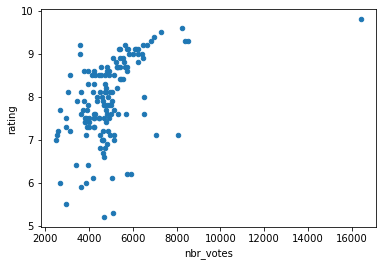

In [40]:
## plot scatterplot of ratings number of ratings x ratings using pandads
df.plot(x='nbr_votes',y='rating',kind='scatter')

<AxesSubplot:xlabel='season', ylabel='rating'>

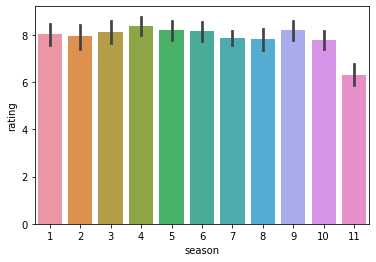

In [36]:
## Plot the average rating for every seasons +/- STD
sns.barplot(data=df,x='season',y='rating')